## 1. Import Libraries

Import all necessary libraries for data analysis, visualization, and modeling.

In [2]:
# Data manipulation
import pandas as pd # handle data frame
import numpy as np  #used for numeral calculation / manipulation

# Visualization
import matplotlib.pyplot as plt # used for making graph
import seaborn as sns # based on matplotlib

# Machine learning
from sklearn.model_selection import train_test_split
#Imports a function that splits your dataset into training and testing subsets.
from sklearn.preprocessing import LabelEncoder, StandardScaler
#LabelEncoder converts text categories → numbers.
#StandardScaler normalizes numerical values (mean 0, standard deviation 1).
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#imported MSE MAE R^2 score(how well the model fits the data)
from google.colab import files
import os

# Upload dataset
print("Please upload the dataset CSV for this deliverable (dataset3.csv).")
uploaded = files.upload()

# Create directory to store figures inside Colab
dataset_id = "dataset3" # a name for naming folders
FIGURES_DIR = f"figures/{dataset_id}"
os.makedirs(FIGURES_DIR, exist_ok=True) #where i'll save plots later


# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
%matplotlib inline

Please upload the dataset CSV for this deliverable (dataset3.csv).


Saving dataset3.csv to dataset3.csv


## 2. Load Data

Load the housing price dataset from the raw data folder.

In [3]:
# Load dataset
df = pd.read_csv('dataset3.csv')

# Display first few rows
print(f"Dataset shape: {df.shape}") # prints shape of the dataset as rows columns
# display first 5 rows of dataframe
df.head()

Dataset shape: (2080, 36)


,property_id,neighborhood,zip_code,distance_to_downtown_km,distance_to_school_km,distance_to_metro_km,property_type,year_built,property_age,lot_size_sqft,...,roof_style,exterior_material,years_since_remodel,kitchen_quality,months_since_last_sale,sale_season,sale_type,school_rating,crime_rate_per_1000,sale_price
0,30000,Suburb_East,10009,4.8,3.8,1.7,Townhouse,1996.0,28,11231,...,Flat,Vinyl,2.0,Fair,80,Summer,Normal,4.7,1.4,125668.14
1,30001,Suburb_East,10013,11.7,1.6,4.2,Townhouse,1993.0,31,4201,...,Gable,Brick,33.0,Average,28,Winter,Normal,6.0,5.1,146109.46
2,30002,Downtown,10000,3.1,1.8,4.9,Condo,1976.0,48,64419,...,Flat,Stucco,12.0,Fair,122,Fall,Normal,10.0,4.9,158221.62
3,30003,Suburb_North,10000,3.1,4.9,13.3,Single Family,1967.0,57,8634,...,Hip,Vinyl,18.0,Fair,39,Summer,Normal,7.0,1.9,114555.98
4,30004,Suburb_South,10015,48.8,3.5,12.1,Single Family,1961.0,63,4638,...,Gable,Wood,19.0,Average,52,Fall,Normal,7.7,4.4,108040.95


## 3. Exploratory Data Analysis (EDA)

### 3.1 Basic Information

Examine the structure and basic statistics of the dataset.

In [4]:
# Display data info
print("Dataset Info:")
print(df.info()) #column names / data type / number of non-null values / memory usage
print("\nBasic Statistics:")
print(df.describe()) # show basic statistics for all numeric columns: count / mean / std / min / 25%, 50%, 75%, max

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_id              2080 non-null   int64  
 1   neighborhood             2080 non-null   object 
 2   zip_code                 2080 non-null   int64  
 3   distance_to_downtown_km  2080 non-null   float64
 4   distance_to_school_km    2080 non-null   float64
 5   distance_to_metro_km     2080 non-null   float64
 6   property_type            2080 non-null   object 
 7   year_built               1852 non-null   float64
 8   property_age             2080 non-null   int64  
 9   lot_size_sqft            2080 non-null   int64  
 10  living_area_sqft         2080 non-null   int64  
 11  num_bedrooms             2080 non-null   int64  
 12  num_bathrooms            2080 non-null   float64
 13  num_floors               2080 non-null   int64  
 14  num_rooms 

### 3.2 Missing Values

Check for missing values in the dataset.

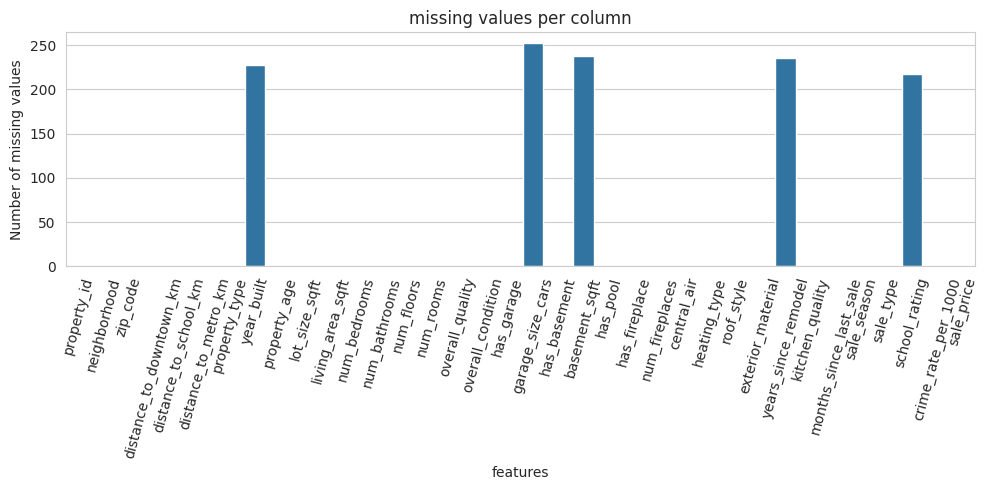

In [5]:
# TODO: Check for missing values and visualize them
# Hint: Use df.isnull().sum() and create a bar plot for columns with missing values
# df.isnull().sum() # output column_name → number_of_missing_values

# output only the columns with missing values
missing = df.isnull().sum()
missing[missing > 0] # boolean index. used as a filter

# start a new figure (canvas) for the plot
# figsize = (10, 5) sets width to 10 inches, height = 5 inches.
plt.figure(figsize=(10, 5))
# create a bar plot using seaborn
# x - axis: column names (missing.index)
# y - axis: number of missing values(missing.values)
sns.barplot(x = missing.index, y = missing.values)

# set title
plt.title("missing values per column")

# label y axis to explain what the numbers mean
plt.ylabel("Number of missing values")

# lable x as well
plt.xlabel("features")

# rotate x axis so long column names do not overlap
plt.xticks(rotation = 75)

# adjust spacing so labels titles and bars fit properly
plt.tight_layout()

# display
plt.show()

### 3.3 Target Variable Distribution

Analyze the distribution of the target variable (sale price).

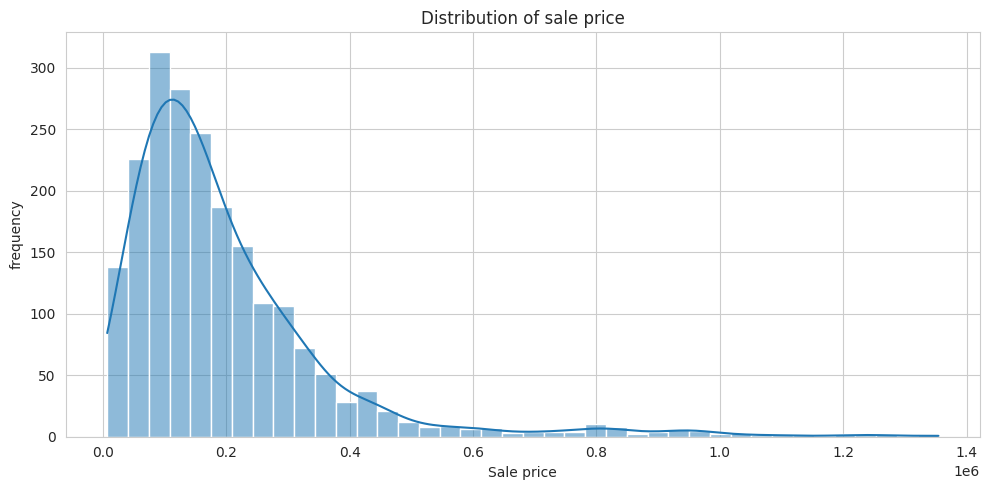

skewness of sale_price:  2.679

Basic statistics for sale_price:
<bound method NDFrame.describe of 0       125668.14
1       146109.46
2       158221.62
3       114555.98
4       108040.95
          ...    
2075    320675.47
2076     92422.31
2077    338060.54
2078    103361.18
2079    299163.34
Name: sale_price, Length: 2080, dtype: float64>

The sale price distribution is skewed


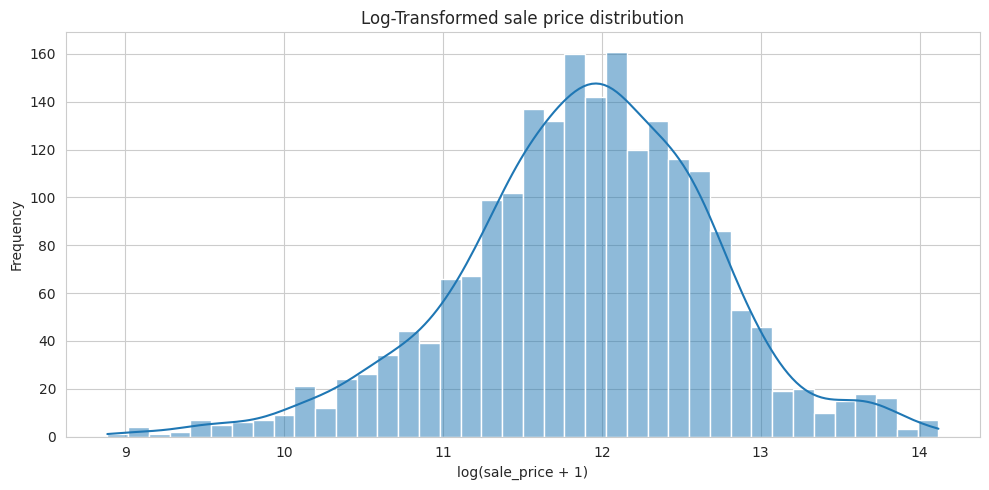

In [11]:
# TODO: Analyze the sale_price distribution
# - Plot histogram
# - Check for skewness
# - Consider log transformation if needed
# - Display basic statistics

from scipy.stats import skew

# create a plot
plt.figure(figsize=(10, 5))

# histogram: bin = 40 -> smoother distribution
# kde = true -> adds a smoothed curve to show the shape better
sns.histplot(df['sale_price'], bins = 40, kde = True)

plt.title("Distribution of sale price")
plt.xlabel("Sale price")
plt.ylabel("frequency")
plt.tight_layout()
plt.show()
# ---------------------------------------------------------
# 2. Calculate skewness of the distribution
# ---------------------------------------------------------
# Skewness tells us if the distribution is:
# - 0     → symmetric
# - > 0   → right-skewed (long tail on the right)
# - < 0   → left-skewed (long tail on the left)

sale_price_skew = skew(df['sale_price'])
print(f"skewness of sale_price: {sale_price_skew: .3f}")

# display statistics for sale price
# show mean std quartiles min max
print("\nBasic statistics for sale_price:")
print(df['sale_price'].describe)

# use log transformation
if sale_price_skew > 0.5:
  # - If skewness > 1 → highly skewed → log transform recommended
  # - If 0.5 < skewness ≤ 1 → moderately skewed → likely helpful
  # - If ≤ 0.5 → little skew → no need for log transform
  print("\nThe sale price distribution is skewed")

  # create a log transformed version of sale price. add +1 to avoid log0 issues
  df['log_sale_price'] = np.log1p(df['sale_price'])

  # plot the transformed distribution
  plt.figure(figsize = (10, 5)) # width 10 height 5
  sns.histplot(df['log_sale_price'], bins = 40, kde = True)
  plt.title("Log-Transformed sale price distribution")

  plt.xlabel("log(sale_price + 1)")
  plt.ylabel("Frequency")
  plt.tight_layout()
  plt.show()

else :{
    print("skewness is low. No need to transform")
}


### 3.4 Feature Exploration

Create visualizations to explore relationships between features and sale price.

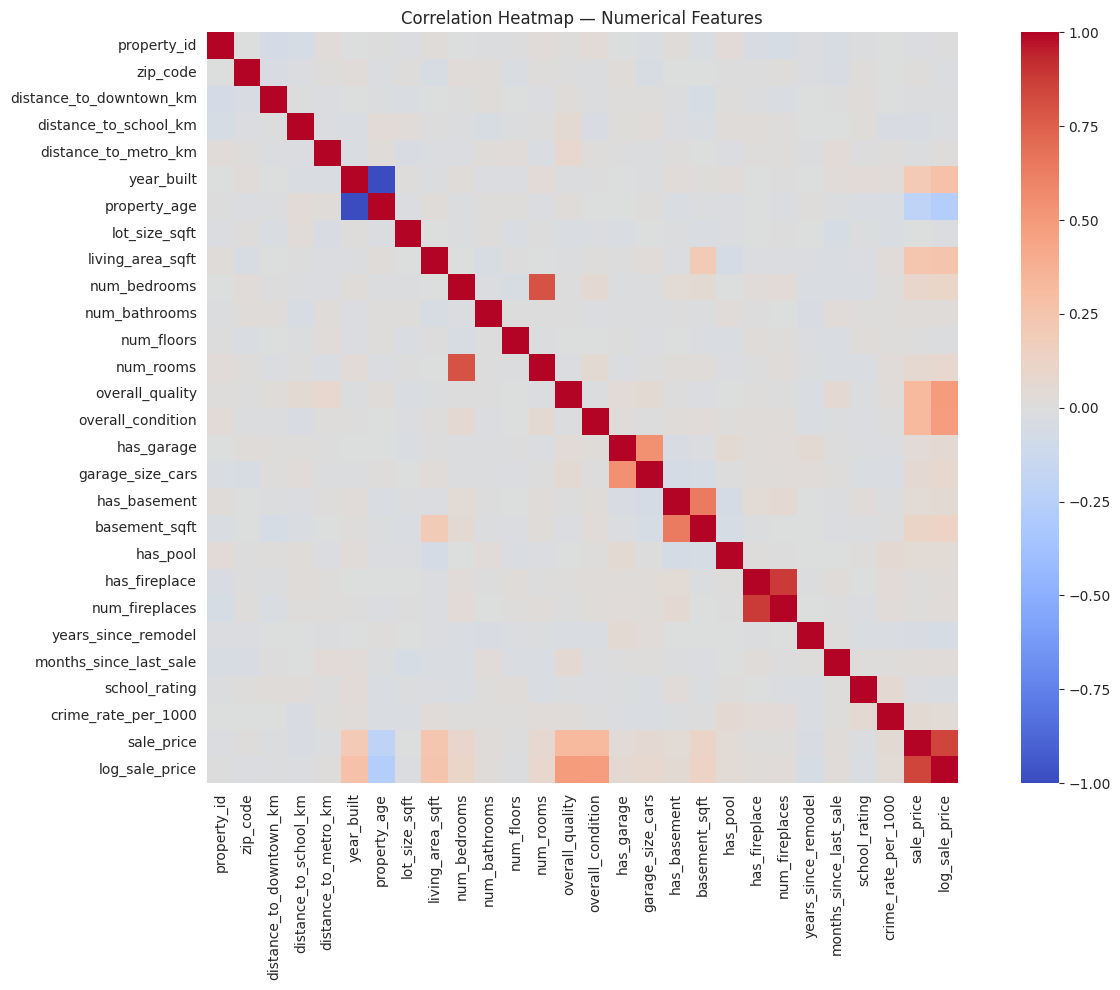

In [15]:
# TODO: Create exploratory visualizations
# Ideas:
# - Correlation heatmap for numerical features
# - Scatter plots: living_area_sqft vs price, overall_quality vs price
# - Box plots: price by neighborhood, property_type
# - Price distribution by categorical features
# - Feature relationships (e.g., bedrooms vs bathrooms)

# Example: Price by neighborhood
# plt.figure(figsize=(14, 6))
# df.groupby('neighborhood')['sale_price'].median().sort_values().plot(kind='bar')
# plt.title('Median Sale Price by Neighborhood')
# plt.ylabel('Sale Price ($)')
# plt.xticks(rotation=45)
# plt.show()

# HEATMAP
# select only numeric columns because of correlation. requires continuous values
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# compute the pairwise correlation matrix
corr_matrix = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm', # blue = negative, red = positive
    center=0,         # center scale at zero
    annot=False,      # no correlation number in each cell
    square=True
)
plt.title("Correlation Heatmap — Numerical Features")
plt.tight_layout()
plt.show()



## 4. Data Cleaning and Preprocessing

### 4.1 Handle Missing Values

Decide how to handle missing values for this housing dataset.

In [ ]:
# TODO: Handle missing values
# Consider:
# - garage_size_cars: missing might mean no garage (fill with 0)
# - basement_sqft: missing might mean no basement (fill with 0)
# - year_built: impute with median or mode
# - Think about what makes sense for each feature

### 4.2 Handle Duplicates

Check for and remove duplicate property entries.

In [ ]:
# TODO: Check for duplicates and remove if necessary

### 4.3 Handle Categorical Variables

Standardize and encode categorical variables. Watch out for inconsistencies!

In [ ]:
# TODO: Standardize categorical values (e.g., 'Yes' vs 'yes')
# TODO: Encode categorical variables
# Consider:
# - One-hot encoding for nominal features (neighborhood, property_type, etc.)
# - Label encoding for ordinal features (overall_quality, kitchen_quality)
# - Binary encoding for yes/no features

### 4.4 Handle Outliers

Identify and handle outliers in price and other numerical features.

In [ ]:
# TODO: Identify outliers
# - Use box plots for visualization
# - Consider IQR method or z-scores
# - Decide whether to remove extreme outliers or cap them
# - Be careful: high prices might be legitimate luxury homes

### 4.5 Feature Engineering (Optional)

Consider creating new features that might improve predictions.

In [ ]:
# TODO: Create new features if helpful
# Ideas:
# - Total bathrooms (including half baths)
# - Price per square foot
# - Age bins (new, modern, old, vintage)
# - Total amenities count
# - Quality × Condition interaction

### 4.6 Handle Skewness

Consider transforming skewed features (especially the target variable if needed).

In [ ]:
# TODO: Check skewness of numerical features
# Consider log transformation for highly skewed features
# Note: if you transform the target, remember to inverse transform predictions

### 4.7 Feature Scaling

Scale numerical features for better model performance.

In [ ]:
# TODO: Scale numerical features
# StandardScaler or RobustScaler (better for outliers)

## 5. Train/Validation Split

Split the data into training and validation sets.

In [ ]:
# TODO: Prepare features (X) and target (y)
# Remove non-predictive columns (e.g., property_id)

# TODO: Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Model Training

Train regression model(s). Consider:
- Linear Regression (baseline)
- Ridge/Lasso Regression (with regularization)
- Random Forest Regressor
- Gradient Boosting Regressor (XGBoost, LightGBM)

In [ ]:
# TODO: Import and train your chosen model(s)

# Example:
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

## 7. Model Evaluation

Evaluate your regression model using appropriate metrics:
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)
- R² Score
- MAPE (Mean Absolute Percentage Error) - optional

In [ ]:
# TODO: Make predictions on the test set
# y_pred = model.predict(X_test)
# If you transformed y, inverse transform here

In [ ]:
# TODO: Calculate and display evaluation metrics
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"RMSE: ${rmse:,.2f}")
# print(f"MAE: ${mae:,.2f}")
# print(f"R² Score: {r2:.4f}")

## 8. Visualizations

Create visualizations to communicate your findings and model performance.

### 8.1 EDA Visualization

Create a visualization that highlights important patterns in the housing data.

In [ ]:
# TODO: Create an EDA visualization
# Save it to content/figures/dataset3/eda_plot.png (inside Colab)

# Ideas:
# - Correlation heatmap of top features
# - Price by neighborhood and property type
# - Scatter plot matrix of key features
# - Price trends by property age or quality

# Example template:
# fig, ax = plt.subplots(figsize=(14, 8))
# # Your visualization code here
# plt.tight_layout()
# plt.savefig('{FIGURE_DIR}/eda_plot.png', dpi=300, bbox_inches='tight')
# plt.show()

### 8.2 Model Performance Visualization

Create a visualization showing regression model performance.

In [ ]:
# TODO: Create a model performance visualization
# Save it to content/figures/dataset3/model_performance.png (inside Colab)

# Ideas:
# - Actual vs Predicted scatter plot with diagonal line
# - Residual plot (residuals vs predicted values)
# - Feature importance (for tree-based models)
# - Distribution of prediction errors

# Example template:
# fig, ax = plt.subplots(figsize=(10, 8))
# # Your visualization code here
# plt.tight_layout()
# plt.savefig('{FIGURE_DIR}/model_performance.png', dpi=300, bbox_inches='tight')
# plt.show()

## 9. Summary and Next Steps

Write a brief summary of:
- Key price drivers identified
- Model performance and prediction accuracy
- Recommendations and potential improvements

**Your Summary Here:**

- Key price drivers: ...
- Model performance: ...
- Limitations: ...
- Next steps: ...

In [ ]:
# Download zip file of your figures
zip_name = f"figures_{dataset_id}.zip"
!zip -r "$zip_name" "$FIGURES_DIR"
print(f"✅ Created {zip_name} — download it from the Files panel on the left.")

## 📤 Submission!

> ⚠️ Important: If your Colab session idles too long, it may restart. \
>  You will need to re-upload your dataset and re-run your notebook before saving figures.

Once you have completed your notebook:

1. **Download your notebook and figures** from Google Colab  

      - `File → Download → Download .ipynb`
      - Download `figures_dataset3.zip` from the left side pane

2. **Upload your completed notebook here:**  

      [Submission Form](https://airtable.com/appGZ1Cp7fr2YNekA/pagsuGiP3ZtSPovtP/form)

## 📣 Certification & Participation

To receive a **DalMLSociety Supervised Learning Certificate**, submit one of the three deliverable notebooks by:

> ⏰ November 23, 2025 @ 11:59 PM Atlantic Time